# Seção 1: Geração
**Definição:** Esta seção apresenta dados sobre a geração horária de energia proveniente das fontes hidráulica, solar e eólica do SIN e por Usina

#### Gráfico de Atendimento à Carga

**Por Mês**

c:\Users\claudionor.junior\OneDrive - FGV\Documentos\GeracaoFlex\data


C:\Users\claudionor.junior\AppData\Local\Temp\ipykernel_14956\1586989435.py:35: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  geracao_por_tipo['Total'] = geracao_por_tipo.iloc[:, 1:].sum(axis=1)


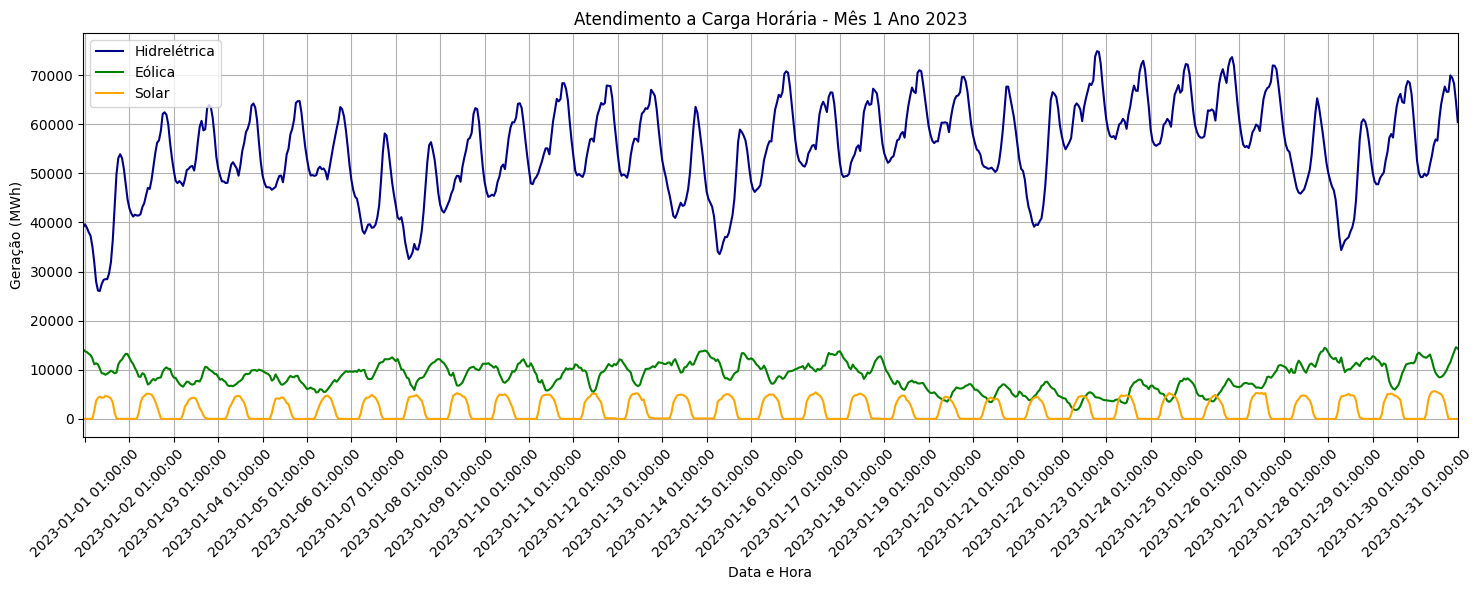

In [9]:
# Importando pacotes 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# Lendo arquivo de geração horária por usina

# Solicitando ao usuário o ano e mês de geração desejado
ano = int(input("Digite o ano de geração desejado (Exemplo: 2021): "))
mes = int(input("Digite o mês de geração desejado (Exemplo: 08): "))

# Definição do caminho do arquivo
diretorio = os.path.dirname(os.getcwd())
caminho = os.path.join(diretorio, 'data')

# Lendo o arquivo de geração de usina
if ano >= 2022:
    geracao = pd.read_csv(os.path.join(caminho, f'GERACAO_USINA-2_{ano}_{mes:02d}.csv'), sep=';', encoding='utf-8')
else:
    geracao = pd.read_csv(os.path.join(caminho, f'GERACAO_USINA_{ano}.csv'), sep=';', encoding='utf-8')

# Convertendo a coluna 'din_instante' para datetime
geracao['din_instante'] = pd.to_datetime(geracao['din_instante'])

# Filtrando para o mês e ano desejado
geracao = geracao[(geracao['din_instante'].dt.year == ano) & (geracao['din_instante'].dt.month == mes)]

# Agregando por tipo de usina e hora
geracao_por_tipo = geracao.groupby([geracao['nom_tipousina'], geracao['din_instante'].dt.floor('H')])['val_geracao'].sum().reset_index()

# Calculando a soma total para cada hora
geracao_por_tipo['Total'] = geracao_por_tipo.iloc[:, 1:].sum(axis=1)

# Filtrando para dados de geração hidráulica
geracao_hidraulica = geracao_por_tipo[geracao_por_tipo['nom_tipousina'] == 'HIDROELÉTRICA']

# Filtrando para dados de geração Eólica
geracao_eolica = geracao_por_tipo[geracao_por_tipo['nom_tipousina'] == 'EOLIELÉTRICA']

# Filtrando para dados de geração Solar
geracao_solar = geracao_por_tipo[geracao_por_tipo['nom_tipousina'] == 'FOTOVOLTAICA']

# Plotar o gráfico
plt.figure(figsize=(15, 6))  # Ajuste a largura da figura aqui (15 é apenas um exemplo)
plt.plot(geracao_hidraulica['din_instante'], geracao_hidraulica['Total'], color='darkblue', linestyle='-', label='Hidrelétrica')
plt.plot(geracao_eolica['din_instante'], geracao_eolica['Total'], color='green', linestyle='-', label='Eólica')
plt.plot(geracao_solar['din_instante'], geracao_solar['Total'], color='orange', linestyle='-', label='Solar')
plt.title('Atendimento a Carga Horária - Mês {} Ano {}'.format(mes, ano))
plt.xlabel('Data e Hora')
plt.ylabel('Geração (MWh)')
plt.grid(True)

# Configurando o eixo x para mostrar o formato de data e hora a cada 3 horas
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=24))  # Define o intervalo de 24 horas

# Definindo o limite mínimo do eixo x para o primeiro dia dos seus dados
plt.xlim(geracao_por_tipo['din_instante'].iloc[0], geracao_por_tipo['din_instante'].iloc[-1])

plt.xticks(rotation=45)  # Rotacionar os rótulos do eixo x para melhor visualização
plt.legend()  # Adiciona a legenda
plt.tight_layout()
plt.show()

#### Geração por Usina

**Por Mês e Ano**

In [ ]:
# Importando pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import os

# Solicitando ao usuário o ano e mês de geração desejado
ano = int(input("Digite o ano de geração desejado (Exemplo: 2021): "))
mes = int(input("Digite o mês de geração desejado (Exemplo: 08): "))

# Definição do caminho do arquivo
diretorio = os.path.dirname(os.getcwd())
caminho = os.path.join(diretorio, 'data')

# Lendo o arquivo de geração de usina
if ano >= 2022:
    geracao = pd.read_csv(os.path.join(caminho, f'GERACAO_USINA-2_{ano}_{mes:02d}.csv'), sep=';', encoding='utf-8')
else:
    geracao = pd.read_csv(os.path.join(caminho, f'GERACAO_USINA_{ano}.csv'), sep=';', encoding='utf-8')

# Convertendo a coluna 'din_instante' para datetime
geracao['din_instante'] = pd.to_datetime(geracao['din_instante'])

# Filtrando para o mês e ano desejado
geracao = geracao[(geracao['din_instante'].dt.year == ano) & (geracao['din_instante'].dt.month == mes)]

# Lista de usinas
usinas = [
    'Água Vermelha',
    'Barra Grande',
    'Theodomiro Carneiro Santiago (Emborcação)',
    'Nova Ponte',
    'Estreito',
    'Lajeado',
    'Itá',
    'Machadinho',
    'Governador Bento Munhoz da Rocha Netto',
    'Governador Ney Aminthas de Barros Braga',
    'Capivara',
    'Tucuruí',
    'Itumbiara',
    'Campos Novos',
    'Peixe Angical',
    'Foz do Chapecó',
    'Passo Fundo',
    'Salto Osório',
    'Salto Santiago'
]

# Filtrar as usinas
geracao = geracao[geracao['nom_usina'].isin(usinas)]

# Adicionando a coluna 'hora'
geracao['hora'] = geracao['din_instante'].dt.hour

# Agregando por usina e hora
geracao_por_usina = geracao.groupby(['hora', 'nom_usina'])['val_geracao'].mean().reset_index()

# Plotar o gráfico
plt.figure(figsize=(15, 6))  # Ajuste a largura da figura aqui (15 é apenas um exemplo)
for usina in usinas:
    geracao_usina = geracao_por_usina[geracao_por_usina['nom_usina'] == usina]
    plt.plot(geracao_usina['hora'], geracao_usina['val_geracao'], label=usina)
plt.title('Geração Horária por Usina - Mês {} Ano {}'.format(mes, ano))
plt.xlabel('Data e Hora')
plt.ylabel('Geraçao (MWh)')
plt.grid(True)
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=24))  # Define o intervalo de 24 horas
plt.xlim(geracao_por_usina['hora'].iloc[0], geracao_por_usina['hora'].iloc[-1])
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()



# Seção 2: Carga Líquida
**Definição:** Esta seção fornece uma análise da diferença entre a carga total do Sistema Interligado Nacional (SIN) e a geração de energia proveniente das fontes eólica e solar em todo o sistema.

**Média Horária Curva do Pato, Geração Solar e Geração Eólica**

C:\Users\claudionor.junior\AppData\Local\Temp\ipykernel_8504\3272043599.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  balanco_SIN['curva_liquida'] = balanco_SIN['val_carga'] - (balanco_SIN['val_gersolar'] + balanco_SIN['val_gereolica'])


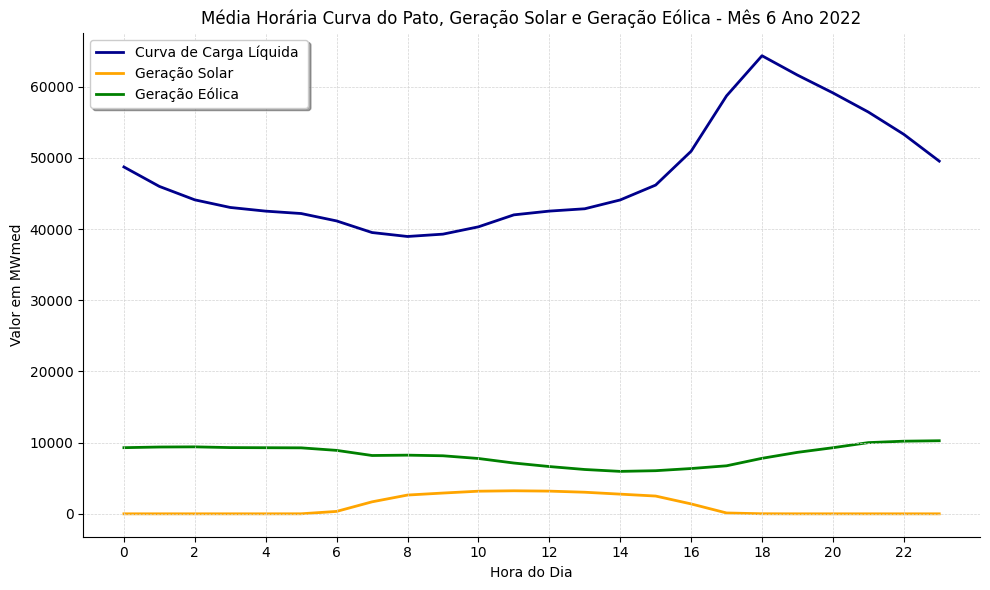

In [1]:
# Importando pacotes necessários
import pandas as pd # Para manipulação de dados
import matplotlib.pyplot as plt # Para plotar gráficos
import os

# Solicitando ao usuário o ano e mês de geração e carga desejado
ano = int(input('Digite o ano de geração e carga desejado (Exemplo: 2022): '))
mes = int(input('Digite o mês de geração e carga desejado (Exemplo: 4): '))

# Definição do caminho do arquivo
diretorio = os.path.dirname(os.getcwd())
caminho = os.path.join(diretorio, 'data')

# Carregando a planilha de balanço energético horário
balanco = pd.read_excel(os.path.join(caminho, 'Balanco_Energetico_Agrupa.xlsx'))

# Filtrando a planilha para obtermos apenas os dados do SIN
balanco_SIN = balanco[balanco['nom_subsistema'] == 'SISTEMA INTERLIGADO NACIONAL']

# Criando a coluna de carga líquida (carga total - (geração solar + geração eólica))
balanco_SIN['curva_liquida'] = balanco_SIN['val_carga'] - (balanco_SIN['val_gersolar'] + balanco_SIN['val_gereolica'])

# Filtrando os dados para o mês e ano escolhidos pelo usuário
balanco_SIN = balanco_SIN[(balanco_SIN['din_instante'].dt.month == mes) & (balanco_SIN['din_instante'].dt.year == ano)]

# Filtrar coluna din_instante para apenas domingo
balanco_SIN = balanco_SIN[balanco_SIN['din_instante'].dt.dayofweek == 6] # Linha para filtrar apenas domingo

# balanco_SIN = balanco_SIN[balanco_SIN['din_instante'].dt.dayofweek < 5] # Linha para filtrar apenas dias de semana

# Criando uma coluna de hora do dia
balanco_SIN['hora'] = balanco_SIN['din_instante'].dt.hour

# Filtrando para geraçao hidráulica do ano escolhido
media_liquida = balanco_SIN.groupby(['hora'])['curva_liquida'].mean().reset_index()

# Filtrando para geração solar do ano escolhido
media_solar = balanco_SIN.groupby(['hora'])['val_gersolar'].mean().reset_index()

# Filtrando para geração eólica do ano escolhido
media_eolica = balanco_SIN.groupby(['hora'])['val_gereolica'].mean().reset_index()

# Plotando o gráfico
plt.figure(figsize=(10, 6))

# Plot da carga liquida para o ano escolhido
plt.plot(media_liquida['hora'], media_liquida['curva_liquida'], color='darkblue', linestyle='-', linewidth=2, label='Curva de Carga Líquida ', zorder=2)

# Plot da geração solar para o ano escolhido
plt.plot(media_solar['hora'], media_solar['val_gersolar'], color='orange', linestyle='-', linewidth=2, label='Geração Solar', zorder=1)

# Plot da geração eólica para o ano escolhido
plt.plot(media_eolica['hora'], media_eolica['val_gereolica'], color='green', linestyle='-', linewidth=2, label='Geração Eólica', zorder=0)


plt.title('Média Horária Curva do Pato, Geração Solar e Geração Eólica - Mês {} Ano {}'.format(mes, ano))
plt.xlabel('Hora do Dia')
plt.ylabel('Valor em MWmed')
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)  # Alterando a cor e o estilo da grade
plt.xticks(range(0, 24, 2))  # Definir os rótulos do eixo x a cada 2 horas
plt.legend()

# Adicionando uma sombra ao redor da legenda
plt.legend(fancybox=True, shadow=True)

# Removendo a moldura do gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

**Gerações Hidráulica, Geração Solar e Carga Média por Hora**

In [ ]:
# Importando pacotes necessários
import pandas as pd # Para manipulação de dados
import matplotlib.pyplot as plt # Para plotar gráficos
import os

# Solicitando ao usuário o ano e mês de geração e carga desejado
ano = int(input('Digite o ano de geração e carga desejado (Exemplo: 2022): '))
mes = int(input('Digite o mês de geração e carga desejado (Exemplo: 4): '))

# Definição do caminho do arquivo
diretorio = os.path.dirname(os.getcwd())
caminho = os.path.join(diretorio, 'data')

# Carregando a planilha de balanço energético horário
balanco = pd.read_excel(os.path.join(caminho, 'Balanco_Energetico_Agrupa.xlsx'))

# Filtrando a planilha para obtermos apenas os dados do SIN
balanco_SIN = balanco[balanco['nom_subsistema'] == 'SISTEMA INTERLIGADO NACIONAL']

# Filtrando os dados para o mês e ano escolhidos pelo usuário em 2023
balanco_SIN = balanco_SIN[(balanco_SIN['din_instante'].dt.month == mes) & (balanco_SIN['din_instante'].dt.year == ano)]

# Filtrando os dados para o domingo
balanco_SIN = balanco_SIN[balanco_SIN['din_instante'].dt.dayofweek == 6] # Linha para filtrar apenas domingo

# Filtrando para somente dias uteis
# balanco_SIN = balanco_SIN[balanco_SIN['din_instante'].dt.dayofweek < 5] # Linha para filtrar apenas dias de semana

# Criando uma coluna de hora do dia
balanco_SIN['hora'] = balanco_SIN['din_instante'].dt.hour

# Filtrando para geraçao hidráulica do ano escolhido
media_hidraulica = balanco_SIN.groupby(['hora'])['val_gerhidraulica'].mean().reset_index()

# Filtrando para geração solar do ano escolhido
media_solar = balanco_SIN.groupby(['hora'])['val_gersolar'].mean().reset_index()

# Filtrando para carga do ano escolhido
media_carga = balanco_SIN.groupby(['hora'])['val_carga'].mean().reset_index()

# Plotando o gráfico
plt.figure(figsize=(10, 6))

# Plot da carga para o ano escolhido
plt.plot(media_carga['hora'], media_carga['val_carga'], color='darkred', linestyle='-', linewidth=2, label='Carga', zorder=2)

# Plot da geração solar para o ano escolhido
plt.plot(media_solar['hora'], media_solar['val_gersolar'], color='orange', linestyle='-', linewidth=1.5, alpha=0.7, marker='o', markersize=5, label='Geração Solar', zorder=1)

# Plot da geração hidráulica para o ano escolhido
plt.plot(media_hidraulica['hora'], media_hidraulica['val_gerhidraulica'], color='darkblue', linestyle='-', linewidth=1.5, alpha=0.7, marker='x', markersize=5, label='Geração Hidráulica', zorder=4)

plt.title('Gerações Hidráulica, Geração Solar e Carga Média por Hora - Domingo Mês {} Ano {}'.format(mes, ano))
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Valor em MWmed', fontsize=12)
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)  # Alterando a cor e o estilo da grade
plt.xticks(range(0, 24, 2), fontsize = 12)
plt.yticks(fontsize=12) 
plt.legend()

# Adicionando uma sombra ao redor da legenda
plt.legend(loc='upper left',fancybox=True, shadow=True)

# Removendo a moldura do gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# Seção 3: Rampas
**Definição:** Nesta seção fornece uma análise da variabilidade entre horas da Curva Líquida, Geração Hidráulica, Geração Solar ou Geração Eólica.

#### Variabilidade por período de 1 hora de um mês escolhido

**Por mês e ano**

In [ ]:
# Importando pacotes necessários
import pandas as pd # Para manipulação de dados
import matplotlib.pyplot as plt  # Para plotar gráficos
import seaborn as sns # Para plotar gráficos
import os

# Solicitando ao usuário o ano e mês de geração e carga desejado
ano = int(input('Digite o ano de geração e carga desejado (Exemplo: 2022): '))
mes = int(input('Digite o mês de geração e carga desejado (Exemplo: 4): '))

# Definição do caminho do arquivo
diretorio = os.path.dirname(os.getcwd())
caminho = os.path.join(diretorio, 'data')

# Carregando a planilha de balanço energético horário
balanco = pd.read_excel(os.path.join(caminho, 'Balanco_Energetico_Agrupa.xlsx'))

# Filtrando a planilha para obtermos apenas os dados do SIN
balanco_SIN = balanco[balanco['nom_subsistema'] == 'SISTEMA INTERLIGADO NACIONAL']

# Preenchenndo os valores falantes com 0
balanco_SIN.fillna(0, inplace=True)

# Criando a coluna de carga líquida (carga total - (geração solar + geração eólica))
balanco_SIN['curva_liquida'] = balanco_SIN['val_carga'] - (balanco_SIN['val_gersolar'] + balanco_SIN['val_gereolica'])

# Convertendo a coluna 'din_instante' para datetime
balanco_SIN['din_instante'] = pd.to_datetime(balanco_SIN['din_instante'])

# Garantindo que os dados estão ordenados por din_instante
balanco_SIN = balanco_SIN.sort_values('din_instante')

# Filtrando os dados para o mês e ano escolhidos pelo usuário
balanco_SIN = balanco_SIN[(balanco_SIN['din_instante'].dt.month == mes) & (balanco_SIN['din_instante'].dt.year == ano)]

# Converter a coluna 'din_instante' para o tipo datetime, se ainda não estiver no formato certo
balanco_SIN['din_instante'] = pd.to_datetime(balanco_SIN['din_instante'])

# Filtre os dados para o domingo
# balanco_SIN = balanco_SIN[balanco_SIN['din_instante'].dt.dayofweek == 6]

# Filtre os dados para somente dias uteis
balanco_SIN = balanco_SIN[balanco_SIN['din_instante'].dt.dayofweek < 5]

# Definir os intervalos de horas desejados
intervalos = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23)]

# Criar uma lista para armazenar os DataFrames filtrados
dataframes_filtrados = []

# Iterar sobre os intervalos e filtrar o DataFrame
for inicio, fim in intervalos:
    df_filtrado = balanco_SIN[(balanco_SIN['din_instante'].dt.hour == inicio) | (balanco_SIN['din_instante'].dt.hour == fim)]
    dataframes_filtrados.append(df_filtrado)


for df in dataframes_filtrados:
    df['diff_val_carga'] = df.groupby(df['din_instante'].dt.date)['val_carga'].diff().fillna(0)
    df['diff_val_gersolar'] = df.groupby(df['din_instante'].dt.date)['val_gersolar'].diff().fillna(0)
    df['diff_val_gereolica'] = df.groupby(df['din_instante'].dt.date)['val_gereolica'].diff().fillna(0)
    df['diff_val_gerhidraulica'] = df.groupby(df['din_instante'].dt.date)['val_gerhidraulica'].diff().fillna(0)
    df['diff_curva_liquida'] = df.groupby(df['din_instante'].dt.date)['curva_liquida'].diff().fillna(0)

    #Removendo o índice adicional
    df.reset_index(drop=True, inplace=True)

    # Excluindo as colunas desnecessárias
    df.drop(['nom_subsistema', 'val_carga', 'val_gersolar', 'val_gereolica', 'val_gerhidraulica', 'curva_liquida','val_gertermica','val_intercambio'], axis=1, inplace=True)

# Concatenar os DataFrames filtrados
balanco_SIN = pd.concat(dataframes_filtrados)


# Tire as linhas igual a 0
balanco_SIN = balanco_SIN[~((balanco_SIN['diff_val_carga'] == 0) & 
                            (balanco_SIN['diff_val_gersolar'] == 0) & 
                            (balanco_SIN['diff_val_gereolica'] == 0) & 
                            (balanco_SIN['diff_val_gerhidraulica'] == 0) & 
                            (balanco_SIN['diff_curva_liquida'] == 0))]


# Criando a coluna de intervalo de 1 hora
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 1, 'intervalo'] = '00-01'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 2, 'intervalo'] = '01-02'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 3, 'intervalo'] = '02-03'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 4, 'intervalo'] = '03-04'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 5, 'intervalo'] = '04-05'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 6, 'intervalo'] = '05-06'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 7, 'intervalo'] = '06-07'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 8, 'intervalo'] = '07-08'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 9, 'intervalo'] = '08-09'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 10, 'intervalo'] = '09-10'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 11, 'intervalo'] = '10-11'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 12, 'intervalo'] = '11-12'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 13, 'intervalo'] = '12-13'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 14, 'intervalo'] = '13-14'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 15, 'intervalo'] = '14-15'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 16, 'intervalo'] = '15-16'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 17, 'intervalo'] = '16-17'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 18, 'intervalo'] = '17-18'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 19, 'intervalo'] = '18-19'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 20, 'intervalo'] = '19-20'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 21, 'intervalo'] = '20-21'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 22, 'intervalo'] = '21-22'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 23, 'intervalo'] = '22-23'

# Criando o boxplot com ajustes visuais
plt.figure(figsize=(12, 6))

# Se optar por plotar a variabilidade de outra variável, basta alterar o eixo y abaixo para
# 'diff_val_gersolar', 'diff_val_gereolica', 'diff_val_gerhidraulica' ou 'diff_curva_liquida'

sns.boxplot(x='intervalo', y='diff_curva_liquida', data=balanco_SIN, color='skyblue', linewidth=1.5, width=0.8)

# Alterar titulo conforme a variabilidade que está sendo plotada
plt.title('Variabilidade da Carga Líquida no Período de 1 Hora - Ano {} e Mês {}'.format(ano, mes), fontsize=16, fontweight='bold')
plt.xlabel('Período de 1 Hora do Dia', fontsize=14)
plt.ylabel('Variabilidade na Carga Líquida (MWmed)', fontsize=14) # Alterar título conforme a variabilidade plotada
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajusta o layout para evitar que partes do gráfico se sobreponham
plt.show()

#### Variabilidade por período de 3 horas de um mês escolhido


**Por mês e ano**

In [ ]:
# Importando pacotes necessários
import pandas as pd # Para manipulação de dados
import matplotlib.pyplot as plt  # Para plotar gráficos
import seaborn as sns # Para plotar gráficos
import os

# Solicitando ao usuário o ano e mês de geração e carga desejado
ano = int(input('Digite o ano de geração e carga desejado (Exemplo: 2022): '))
mes = int(input('Digite o mês de geração e carga desejado (Exemplo: 4): '))

# Definição do caminho do arquivo
diretorio = os.path.dirname(os.getcwd())
caminho = os.path.join(diretorio, 'data')

# Carregando a planilha de balanço energético horário
balanco = pd.read_excel(os.path.join(caminho, 'Balanco_Energetico_Agrupa.xlsx'))

# Filtrando a planilha para obtermos apenas os dados do SIN
balanco_SIN = balanco[balanco['nom_subsistema'] == 'SISTEMA INTERLIGADO NACIONAL']

# Preenchenndo os valores falantes com 0
balanco_SIN.fillna(0, inplace=True)

# Criando a coluna de carga líquida (carga total - (geração solar + geração eólica))
balanco_SIN['curva_liquida'] = balanco_SIN['val_carga'] - (balanco_SIN['val_gersolar'] + balanco_SIN['val_gereolica'])

# Convertendo a coluna 'din_instante' para datetime
balanco_SIN['din_instante'] = pd.to_datetime(balanco_SIN['din_instante'])

# Garantindo que os dados estão ordenados por din_instante
balanco_SIN = balanco_SIN.sort_values('din_instante')

# Filtrando os dados para o mês e ano escolhidos pelo usuário
balanco_SIN = balanco_SIN[(balanco_SIN['din_instante'].dt.month == mes) & (balanco_SIN['din_instante'].dt.year == ano)]

# Converter a coluna 'din_instante' para o tipo datetime, se ainda não estiver no formato certo
balanco_SIN['din_instante'] = pd.to_datetime(balanco_SIN['din_instante'])

# Definir os intervalos de horas desejados
intervalos = [(0, 3), (3, 6), (6, 9), (9, 12), (12, 15), (15, 18), (18, 21), (21, 23)]

# Criar uma lista para armazenar os DataFrames filtrados
dataframes_filtrados = []

# Iterar sobre os intervalos e filtrar o DataFrame
for inicio, fim in intervalos:
    df_filtrado = balanco_SIN[(balanco_SIN['din_instante'].dt.hour == inicio) | (balanco_SIN['din_instante'].dt.hour == fim)]
    dataframes_filtrados.append(df_filtrado)

# Novamente ordenando os dados por din_instante para garantir as diferenças corretas
balanco_SIN = balanco_SIN.sort_values('din_instante')

for df in dataframes_filtrados:
    df['diff_val_carga'] = df.groupby(df['din_instante'].dt.date)['val_carga'].diff().fillna(0)
    df['diff_val_gersolar'] = df.groupby(df['din_instante'].dt.date)['val_gersolar'].diff().fillna(0)
    df['diff_val_gereolica'] = df.groupby(df['din_instante'].dt.date)['val_gereolica'].diff().fillna(0)
    df['diff_val_gerhidraulica'] = df.groupby(df['din_instante'].dt.date)['val_gerhidraulica'].diff().fillna(0)
    df['diff_curva_liquida'] = df.groupby(df['din_instante'].dt.date)['curva_liquida'].diff().fillna(0)

    #Removendo o índice adicional
    df.reset_index(drop=True, inplace=True)

    # Excluindo as colunas desnecessárias
    df.drop(['nom_subsistema', 'val_carga', 'val_gersolar', 'val_gereolica', 'val_gerhidraulica', 'curva_liquida','val_gertermica','val_intercambio'], axis=1, inplace=True)

# Concatenar os DataFrames filtrados
balanco_SIN = pd.concat(dataframes_filtrados)

# Tirando os 0 da diferença
balanco_SIN = balanco_SIN[~((balanco_SIN['diff_val_carga'] == 0) & 
                            (balanco_SIN['diff_val_gersolar'] == 0) & 
                            (balanco_SIN['diff_val_gereolica'] == 0) & 
                            (balanco_SIN['diff_val_gerhidraulica'] == 0) & 
                            (balanco_SIN['diff_curva_liquida'] == 0))]


# Criando a coluna de intervalo
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 3, 'intervalo'] = '00-03'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 6, 'intervalo'] = '03-06'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 9, 'intervalo'] = '06-09'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 12, 'intervalo'] = '09-12'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 15, 'intervalo'] = '12-15'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 18, 'intervalo'] = '15-18'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 21, 'intervalo'] = '18-21'
balanco_SIN.loc[balanco_SIN['din_instante'].dt.hour == 23, 'intervalo'] = '21-23'


# Criando o boxplot com ajustes visuais
plt.figure(figsize=(12, 6))

# Se optar por plotar a variabilidade de outra variável, basta alterar o eixo y abaixo para
# 'diff_val_gersolar', 'diff_val_gereolica', 'diff_val_gerhidraulica' ou 'diff_curva_liquida'

sns.boxplot(x='intervalo', y='diff_curva_liquida', data=balanco_SIN, color='skyblue', linewidth=1.5, width=0.8)
plt.title('Variabilidade da Curva Líquida no Período de 3 Horas - Ano {} e Mês {}'.format(ano, mes), fontsize=16, fontweight='bold')
plt.xlabel('Período de 3 Horas do Dia', fontsize=14)
plt.ylabel('Variabilidade na Geração de Energia', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()  # Ajusta o layout para evitar que partes do gráfico se sobreponham
plt.show()

### Variabilidade por período e mês escolhido de 2016 a 2023

In [ ]:
# Importando pacotes necessários
import pandas as pd # Para manipulação de dados
import matplotlib.pyplot as plt  # Para plotar gráficos
import seaborn as sns # Para plotar gráficos
from matplotlib.lines import Line2D
import os


# Solicitando ao usuário o ano e mês de geração e carga desejado
mes = int(input('Digite o mês de geração e carga desejado (Exemplo: 4): '))
periodo_inicial = int(input('Digite a hora inicial para analisar a variação: '))
periodo_final = int(input('Digite a hora final para analisar a variação: '))


# Definição do caminho do arquivo
diretorio = os.path.dirname(os.getcwd())
caminho = os.path.join(diretorio, 'data')

# Carregando a planilha de balanço energético horário
balanco = pd.read_excel(os.path.join(caminho, 'Balanco_Energetico_Agrupa.xlsx'))

# Filtrando a planilha para obtermos apenas os dados do SIN
balanco_SIN = balanco[balanco['nom_subsistema'] == 'SISTEMA INTERLIGADO NACIONAL']

# Preenchenndo os valores falantes com 0
balanco_SIN.fillna(0, inplace=True)

# Criando a coluna de carga líquida (carga total - (geração solar + geração eólica))
balanco_SIN['curva_liquida'] = balanco_SIN['val_carga'] - (balanco_SIN['val_gersolar'] + balanco_SIN['val_gereolica'])

# Convertendo a coluna 'din_instante' para datetime
balanco_SIN['din_instante'] = pd.to_datetime(balanco_SIN['din_instante'])

# Garantindo que os dados estão ordenados por din_instante
balanco_SIN = balanco_SIN.sort_values('din_instante')

# Filtrando os dados para o mês escolhido pelo usuário
balanco_SIN = balanco_SIN[(balanco_SIN['din_instante'].dt.month == mes)]

# Filtrando os dados para os anos de 2016 a 2023
balanco_SIN = balanco_SIN[(balanco_SIN['din_instante'].dt.year >= 2016) & (balanco_SIN['din_instante'].dt.year <= 2023)]

# # Filtrar coluna din_instante para apenas domingo
# balanco_SIN = balanco_SIN[balanco_SIN['din_instante'].dt.dayofweek == 6] # Linha para filtrar apenas domingo

# # Filtrar coluna din_instante para dias uteis
balanco_SIN = balanco_SIN[balanco_SIN['din_instante'].dt.dayofweek < 5] # Linha para filtrar apenas dias de semana

# Filtre apenas a hora do dia 15 e 18
balanco_SIN = balanco_SIN[(balanco_SIN['din_instante'].dt.hour == periodo_inicial) | (balanco_SIN['din_instante'].dt.hour == periodo_final)]

# Ordenando os dados pelo instante
balanco_SIN = balanco_SIN.sort_values(by='din_instante')

# Subtraindo os valores de geração 
balanco_SIN['diff_val_carga'] = balanco_SIN.groupby(balanco_SIN['din_instante'].dt.date)['val_carga'].diff().fillna(0)
balanco_SIN['diff_val_gersolar'] = balanco_SIN.groupby(balanco_SIN['din_instante'].dt.date)['val_gersolar'].diff().fillna(0)
balanco_SIN['diff_val_gereolica'] = balanco_SIN.groupby(balanco_SIN['din_instante'].dt.date)['val_gereolica'].diff().fillna(0)
balanco_SIN['diff_val_gerhidraulica'] = balanco_SIN.groupby(balanco_SIN['din_instante'].dt.date)['val_gerhidraulica'].diff().fillna(0)
balanco_SIN['diff_curva_liquida'] = balanco_SIN.groupby(balanco_SIN['din_instante'].dt.date)['curva_liquida'].diff().fillna(0)

#Removendo o índice adicional
balanco_SIN.reset_index(drop=True, inplace=True)

# Excluindo as colunas desnecessárias
balanco_SIN.drop(['nom_subsistema', 'val_carga', 'val_gersolar', 'val_gereolica', 'val_gerhidraulica', 'curva_liquida'], axis=1, inplace=True)

# Tirando os 0 da diferença
balanco_SIN = balanco_SIN[~((balanco_SIN['diff_val_carga'] == 0) & 
                            (balanco_SIN['diff_val_gersolar'] == 0) & 
                            (balanco_SIN['diff_val_gereolica'] == 0) & 
                            (balanco_SIN['diff_val_gerhidraulica'] == 0) & 
                            (balanco_SIN['diff_curva_liquida'] == 0))]

# Criando outra coluna em formato de intervalo
balanco_SIN['intervalo'] = '{}-{}'.format(periodo_inicial, periodo_final)

# Criar uma lista de anos de interesse
anos_interesse = range(2016, 2024)

# Criar uma lista de cores para os anos
cores = sns.color_palette('viridis', len(anos_interesse))
# Criar objetos Line2D para representar os anos na legenda
legend_elements = [Line2D([0], [0], marker='s', color=color, label=str(ano), markersize=10) for ano, color in zip(anos_interesse, cores)]

# Criando o boxplot com ajustes visuais
plt.figure(figsize=(12, 6))
# Se quiser mudar o tipo de geracao, basta mudar o eixo y para diff_val_gersolar, diff_val_gereolica, diff_val_gerhidraulica ou 
# diff_curva_liquida
sns.boxplot(x='intervalo', y='diff_val_gerhidraulica', hue=balanco_SIN['din_instante'].dt.year, data=balanco_SIN, palette='viridis', widths=0.05)
plt.title('Histórico de Variabilidade da Rampa Geração Hidráulica no Período de {} até {} Horas (2016-2023)- Mês {}'.format(periodo_inicial, periodo_final, mes), fontsize=16, fontweight='bold')
plt.xlabel('Intervalo', fontsize=14)
plt.ylabel('Rampa de Geração Hidráulica (MWmed)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout() 
plt.legend(handles=legend_elements, title='Ano', title_fontsize='14', fontsize='12', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Gráfico Empilhado de Tipos de Gerações e Cargas ###

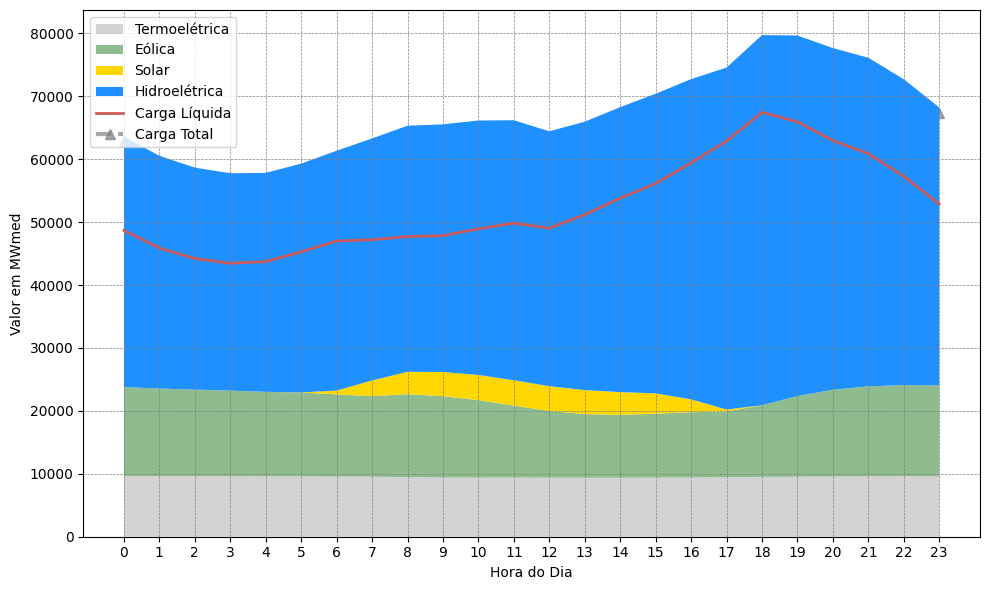

In [1]:
# Importando pacotes necessários
import pandas as pd # Para manipulação de dados
import matplotlib.pyplot as plt # Para plotar gráficos
import os

# Solicitando ao usuário o ano e mês de geração e carga desejado
ano = int(input('Digite o ano de geração e carga desejado (Exemplo: 2022): '))
mes = int(input('Digite o mês de geração e carga desejado (Exemplo: 4): '))

# Definição do caminho do arquivo
diretorio = os.path.dirname(os.getcwd())
caminho = os.path.join(diretorio, 'data')

# Carregando a planilha de balanço energético horário
balanco = pd.read_excel(os.path.join(caminho, 'Balanco_Energetico_Agrupa.xlsx'))

# Filtrando a planilha para obtermos apenas os dados do SIN
balanco_SIN = balanco[balanco['nom_subsistema'] == 'SISTEMA INTERLIGADO NACIONAL']

# Filtrando os dados para o mês e ano escolhidos pelo usuário
balanco_SIN = balanco_SIN[(balanco_SIN['din_instante'].dt.month == mes) & (balanco_SIN['din_instante'].dt.year == ano)]

# Criando a coluna de carga líquida (carga total - (geração solar + geração eólica))
balanco_SIN['curva_liquida'] = balanco_SIN['val_carga'] - (balanco_SIN['val_gersolar'] + balanco_SIN['val_gereolica'])

# Criando uma coluna de hora do dia
balanco_SIN['hora'] = balanco_SIN['din_instante'].dt.hour

# Agregar os dados por hora, calculando a média da carga líquida, geração solar, geração eólica e carga para cada hora do dia
media_liquida = balanco_SIN.groupby(['hora'])['curva_liquida'].mean().reset_index()
media_solar = balanco_SIN.groupby(['hora'])['val_gersolar'].mean().reset_index()
media_eolica = balanco_SIN.groupby(['hora'])['val_gereolica'].mean().reset_index()
media_carga = balanco_SIN.groupby(['hora'])['val_carga'].mean().reset_index()
media_hidro = balanco_SIN.groupby(['hora'])['val_gerhidraulica'].mean().reset_index()
media_termo = balanco_SIN.groupby(['hora'])['val_gertermica'].mean().reset_index()

# Plotando o gráfico
plt.figure(figsize=(10, 6))

plt.stackplot(media_liquida['hora'],media_termo['val_gertermica'],media_eolica['val_gereolica'],media_solar['val_gersolar'],media_hidro['val_gerhidraulica'],labels=['Termoelétrica','Eólica','Solar','Hidroelétrica'], colors=['lightgrey','darkseagreen','gold','dodgerblue'])

# Plot da carga líquida
plt.plot(media_liquida['hora'], media_liquida['curva_liquida'], color='indianred', linestyle='-', linewidth=2, label='Carga Líquida', zorder=3)

# Plot da carga total
plt.plot(media_carga['hora'], media_carga['val_carga'], color='grey', linestyle='dashed', linewidth=3, alpha=0.7, marker='^', markersize=7, label='Carga Total', zorder=0)

plt.style.use('default')
# plt.title('Média horária da Geração, Carga Total e Carga Líquida ("Curva do Pato") - Mês {} de {}'.format(mes, ano))
plt.xlabel('Hora do Dia')
plt.ylabel('Valor em MWmed')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.xticks(range(24))  # Definir os rótulos do eixo x como as horas do dia (0 a 23)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()